# CODSOFT

# TASK 3

# CUSTOMER CHURN PREDICTION

Develop a model to predict customer churn for a subscription-
based service or business. Use historical customer data, including
features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient
Boosting to predict churn.

# DataSet
https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data = pd.read_csv("Churn_Modelling.csv" , index_col=0)
train_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
train_data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
train_data.duplicated().sum()

0

In [6]:
train_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


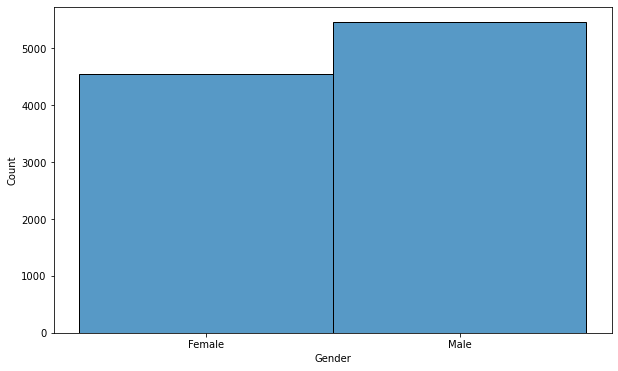

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(train_data["Gender"] )
plt.show()

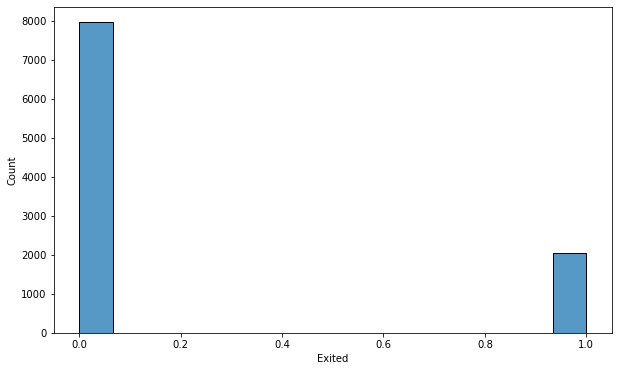

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(train_data["Exited"] )
plt.show()

In [9]:
train_data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Data cleaning and preprocessing

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_data["Gender"])
le.classes_

array(['Female', 'Male'], dtype=object)

In [11]:
g = le.transform(train_data["Gender"])
g

array([0, 0, 0, ..., 0, 1, 0])

In [12]:
train_data["Gender_encoder"] = g

In [13]:
train_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoder
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [14]:
train_data = train_data.drop(["Gender"] , axis = 1)
train_data.head()

,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoder
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,0
2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,0
4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,0
5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
 12  Gender_encoder   10000 non-null  int32  
dtypes: float64(2), int32(1), int64(8), object(2)
memory usage: 1.0+ MB


In [16]:
train_data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [17]:
train_data = train_data.drop(["Surname"] , axis = 1)
train_data

,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoder
RowNumber,,,,,,,,,,,,
1,15634602,619,France,42,2,0.00,1,1,1,101348.88,1,0
2,15647311,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
3,15619304,502,France,42,8,159660.80,3,1,0,113931.57,1,0
4,15701354,699,France,39,1,0.00,2,0,0,93826.63,0,0
5,15737888,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,771,France,39,5,0.00,2,1,0,96270.64,0,1
9997,15569892,516,France,35,10,57369.61,1,1,1,101699.77,0,1
9998,15584532,709,France,36,7,0.00,1,0,1,42085.58,1,0


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  Gender_encoder   10000 non-null  int32  
dtypes: float64(2), int32(1), int64(8), object(1)
memory usage: 976.6+ KB


In [19]:
train_data = train_data.drop(["CustomerId"] , axis = 1)
train_data.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoder
RowNumber,,,,,,,,,,,
1,619,France,42,2,0.00,1,1,1,101348.88,1,0
2,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
3,502,France,42,8,159660.80,3,1,0,113931.57,1,0
4,699,France,39,1,0.00,2,0,0,93826.63,0,0
5,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0


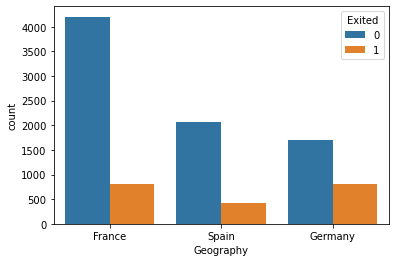

In [20]:
sns.countplot(x='Geography',hue='Exited',data=train_data)
plt.show()

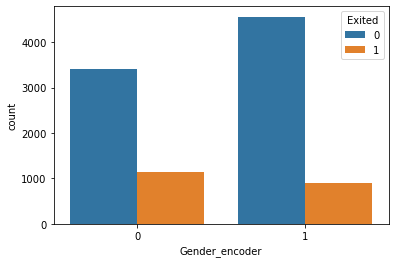

In [21]:
sns.countplot(x='Gender_encoder',hue='Exited',data=train_data)
plt.show()
# "0" female
# "1" male

In [22]:
train_data = pd.get_dummies(train_data, columns=['Geography'])
train_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoder,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
3,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


In [23]:
train_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_encoder',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [24]:

order = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary',  'Gender_encoder'
         , 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Exited']
train_data = train_data[order]
train_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_encoder,Geography_France,Geography_Germany,Geography_Spain,Exited
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,0,1,0,0,1
2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0,1
4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0


In [25]:
X = train_data.drop(['Exited'] , axis = 1)
y = train_data['Exited']

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
print(X.shape)
y.shape

(10000, 12)


(10000,)

# Build and train the model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [29]:
lg.fit(X_train,y_train)

LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = lg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [31]:
rf.fit(X_train,y_train)
    

RandomForestClassifier(random_state=42)

In [32]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [33]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=2)

In [34]:
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [35]:
models = {
    'lg':lg,
    'rf':rf,
    'gb':gb
}

In [36]:
def train_modelss_and_predict(models,X_train,X_test,y_train,y_test):
    acc = []
    prec = []
    
    for m in models:
        model = models[m]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test,y_pred))
        prec.append(precision_score(y_test,y_pred))
        #conf_matrix.append(confusion_matrix(y_test,y_pred))

    return acc, prec

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
accuracy, precision = train_modelss_and_predict(models,X_train,X_test,y_train,y_test)

In [38]:
accuracy, precision

([0.811, 0.8655, 0.8625], [0.5524475524475524, 0.748, 0.7587719298245614])

In [39]:
performance = {
    'classifiers':list(models.keys()),
    'accuracy':accuracy,
    'precision':precision
}
performance 

{'classifiers': ['lg', 'rf', 'gb'],
 'accuracy': [0.811, 0.8655, 0.8625],
 'precision': [0.5524475524475524, 0.748, 0.7587719298245614]}

In [40]:
df = pd.DataFrame(performance).sort_values(by='accuracy',ascending=False)
df.head()

,classifiers,accuracy,precision
1,rf,0.8655,0.748000
2,gb,0.8625,0.758772
0,lg,0.8110,0.552448


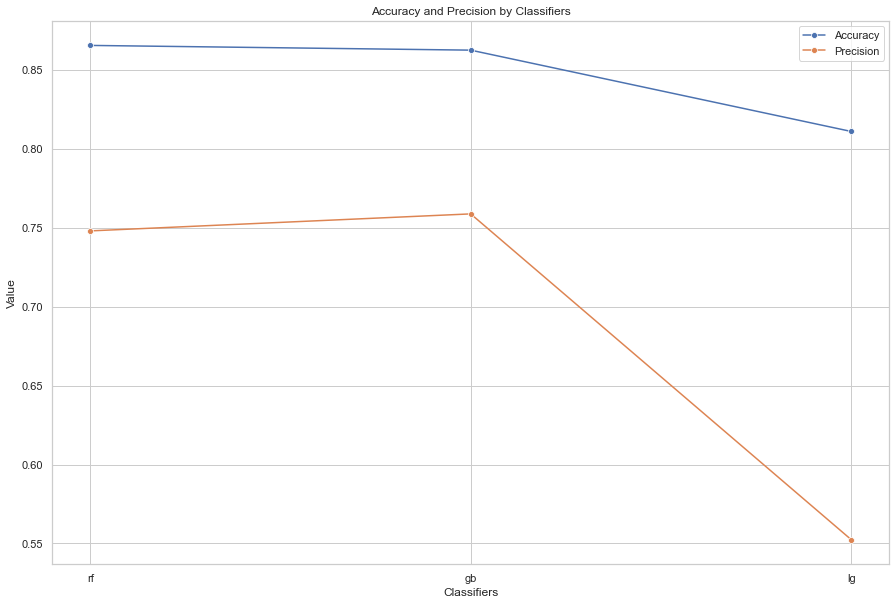

In [41]:
plt.figure(figsize = (15,10))
sns.set(style="whitegrid")
sns.lineplot(x=df.classifiers, y=df.accuracy, marker='o', label='Accuracy', data=df)
sns.lineplot(x=df.classifiers, y=df.precision, marker='o', label='Precision', data=df)

plt.title("Accuracy and Precision by Classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Value")
plt.legend()
plt.show()